Import data into Dataframe

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option("max_columns", None)

In [2]:
reviews = pd.read_csv(r"C:\Users\kamat\Downloads\seattle\reviews.csv")
listings = pd.read_csv(r"C:\Users\kamat\Downloads\seattle\listings.csv")

In [3]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


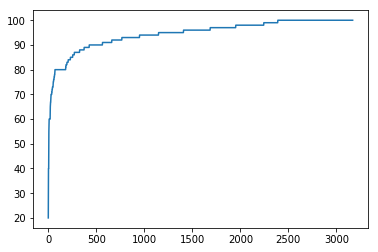

In [5]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()

The plot for review_scores_rating

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kamat\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment=[]
for sentence in reviews['comments'].values:
    
    ss = sid.polarity_scores(sentence)
    
    for iters,k in enumerate(sorted(ss)):
        print('  {0}: {1}, '.format(k, ss[k]), end='')
    print()

  compound: 0.7901,   neg: 0.0,   neu: 0.462,   pos: 0.538, 
  compound: 0.9872,   neg: 0.0,   neu: 0.609,   pos: 0.391, 
  compound: 0.8718,   neg: 0.043,   neu: 0.772,   pos: 0.185, 
  compound: 0.8313,   neg: 0.035,   neu: 0.765,   pos: 0.2, 
  compound: 0.9783,   neg: 0.0,   neu: 0.655,   pos: 0.345, 
  compound: 0.9349,   neg: 0.0,   neu: 0.631,   pos: 0.369, 
  compound: 0.9421,   neg: 0.0,   neu: 0.547,   pos: 0.453, 
  compound: 0.9671,   neg: 0.028,   neu: 0.67,   pos: 0.302, 
  compound: 0.5562,   neg: 0.104,   neu: 0.758,   pos: 0.138, 
  compound: 0.8613,   neg: 0.0,   neu: 0.81,   pos: 0.19, 
  compound: 0.9475,   neg: 0.0,   neu: 0.782,   pos: 0.218, 
  compound: 0.9503,   neg: 0.0,   neu: 0.799,   pos: 0.201, 
  compound: 0.7474,   neg: 0.0,   neu: 0.586,   pos: 0.414, 
  compound: 0.9678,   neg: 0.0,   neu: 0.434,   pos: 0.566, 
  compound: 0.7819,   neg: 0.143,   neu: 0.596,   pos: 0.26, 
  compound: 0.9183,   neg: 0.0,   neu: 0.567,   pos: 0.433, 
  compound: 0.9804, 

  compound: 0.9827,   neg: 0.0,   neu: 0.694,   pos: 0.306, 
  compound: 0.9422,   neg: 0.0,   neu: 0.668,   pos: 0.332, 
  compound: 0.9241,   neg: 0.0,   neu: 0.782,   pos: 0.218, 
  compound: 0.8199,   neg: 0.0,   neu: 0.888,   pos: 0.112, 
  compound: 0.9884,   neg: 0.012,   neu: 0.598,   pos: 0.39, 
  compound: 0.9495,   neg: 0.0,   neu: 0.657,   pos: 0.343, 
  compound: 0.9879,   neg: 0.07,   neu: 0.769,   pos: 0.161, 
  compound: 0.9936,   neg: 0.013,   neu: 0.701,   pos: 0.286, 
  compound: 0.9781,   neg: 0.0,   neu: 0.661,   pos: 0.339, 
  compound: 0.872,   neg: 0.0,   neu: 0.873,   pos: 0.127, 
  compound: 0.9813,   neg: 0.0,   neu: 0.543,   pos: 0.457, 
  compound: 0.9189,   neg: 0.03,   neu: 0.838,   pos: 0.132, 
  compound: 0.9531,   neg: 0.0,   neu: 0.751,   pos: 0.249, 
  compound: 0.9454,   neg: 0.0,   neu: 0.643,   pos: 0.357, 
  compound: 0.9836,   neg: 0.0,   neu: 0.69,   pos: 0.31, 
  compound: 0.9522,   neg: 0.0,   neu: 0.383,   pos: 0.617, 
  compound: 0.8765,   

  compound: 0.9977,   neg: 0.0,   neu: 0.799,   pos: 0.201, 
  compound: 0.9304,   neg: 0.022,   neu: 0.736,   pos: 0.242, 
  compound: 0.9846,   neg: 0.017,   neu: 0.702,   pos: 0.28, 
  compound: 0.9754,   neg: 0.0,   neu: 0.674,   pos: 0.326, 
  compound: 0.9713,   neg: 0.0,   neu: 0.581,   pos: 0.419, 
  compound: 0.9643,   neg: 0.0,   neu: 0.487,   pos: 0.513, 
  compound: 0.8718,   neg: 0.0,   neu: 0.526,   pos: 0.474, 
  compound: 0.9979,   neg: 0.0,   neu: 0.684,   pos: 0.316, 
  compound: 0.9134,   neg: 0.0,   neu: 0.562,   pos: 0.438, 
  compound: 0.861,   neg: 0.0,   neu: 0.611,   pos: 0.389, 
  compound: 0.963,   neg: 0.0,   neu: 0.598,   pos: 0.402, 
  compound: 0.9168,   neg: 0.0,   neu: 0.457,   pos: 0.543, 
  compound: 0.9935,   neg: 0.0,   neu: 0.712,   pos: 0.288, 
  compound: 0.8952,   neg: 0.0,   neu: 0.731,   pos: 0.269, 
  compound: 0.9673,   neg: 0.039,   neu: 0.644,   pos: 0.317, 
  compound: 0.9542,   neg: 0.0,   neu: 0.617,   pos: 0.383, 
  compound: 0.0,   ne

  compound: 0.9774,   neg: 0.0,   neu: 0.755,   pos: 0.245, 
  compound: 0.9897,   neg: 0.0,   neu: 0.71,   pos: 0.29, 
  compound: 0.9895,   neg: 0.013,   neu: 0.71,   pos: 0.278, 
  compound: 0.7906,   neg: 0.0,   neu: 0.767,   pos: 0.233, 
  compound: 0.9902,   neg: 0.0,   neu: 0.797,   pos: 0.203, 
  compound: 0.9468,   neg: 0.0,   neu: 0.841,   pos: 0.159, 
  compound: 0.9545,   neg: 0.0,   neu: 0.668,   pos: 0.332, 
  compound: 0.4215,   neg: 0.0,   neu: 0.743,   pos: 0.257, 
  compound: 0.9686,   neg: 0.0,   neu: 0.699,   pos: 0.301, 
  compound: 0.978,   neg: 0.0,   neu: 0.694,   pos: 0.306, 
  compound: 0.9346,   neg: 0.0,   neu: 0.647,   pos: 0.353, 
  compound: 0.9843,   neg: 0.0,   neu: 0.59,   pos: 0.41, 
  compound: 0.9776,   neg: 0.0,   neu: 0.69,   pos: 0.31, 
  compound: 0.8004,   neg: 0.0,   neu: 0.84,   pos: 0.16, 
  compound: 0.9738,   neg: 0.0,   neu: 0.727,   pos: 0.273, 
  compound: 0.9638,   neg: 0.0,   neu: 0.582,   pos: 0.418, 
  compound: 0.9246,   neg: 0.0, 

  compound: 0.9118,   neg: 0.0,   neu: 0.885,   pos: 0.115, 
  compound: 0.8225,   neg: 0.0,   neu: 0.848,   pos: 0.152, 
  compound: 0.9937,   neg: 0.018,   neu: 0.742,   pos: 0.24, 
  compound: 0.9777,   neg: 0.0,   neu: 0.633,   pos: 0.367, 
  compound: 0.7744,   neg: 0.0,   neu: 0.308,   pos: 0.692, 
  compound: 0.8537,   neg: 0.0,   neu: 0.736,   pos: 0.264, 
  compound: 0.9543,   neg: 0.028,   neu: 0.75,   pos: 0.222, 
  compound: 0.9176,   neg: 0.0,   neu: 0.78,   pos: 0.22, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.8724,   neg: 0.031,   neu: 0.831,   pos: 0.138, 
  compound: 0.9775,   neg: 0.0,   neu: 0.5,   pos: 0.5, 
  compound: 0.8024,   neg: 0.0,   neu: 0.882,   pos: 0.118, 
  compound: 0.8924,   neg: 0.053,   neu: 0.785,   pos: 0.163, 
  compound: 0.9784,   neg: 0.0,   neu: 0.446,   pos: 0.554, 
  compound: 0.9313,   neg: 0.0,   neu: 0.764,   pos: 0.236, 
  compound: 0.4404,   neg: 0.0,   neu: 0.0,   pos: 1.0, 
  compound: 0.9878,   neg: 0.0,   n

  compound: 0.9072,   neg: 0.0,   neu: 0.669,   pos: 0.331, 
  compound: 0.9382,   neg: 0.033,   neu: 0.781,   pos: 0.186, 
  compound: 0.2591,   neg: 0.08,   neu: 0.806,   pos: 0.114, 
  compound: 0.9843,   neg: 0.0,   neu: 0.787,   pos: 0.213, 
  compound: 0.9025,   neg: 0.063,   neu: 0.757,   pos: 0.18, 
  compound: 0.8622,   neg: 0.0,   neu: 0.714,   pos: 0.286, 
  compound: 0.8792,   neg: 0.017,   neu: 0.836,   pos: 0.147, 
  compound: 0.8997,   neg: 0.0,   neu: 0.421,   pos: 0.579, 
  compound: 0.9845,   neg: 0.0,   neu: 0.561,   pos: 0.439, 
  compound: 0.89,   neg: 0.0,   neu: 0.844,   pos: 0.156, 
  compound: 0.9735,   neg: 0.033,   neu: 0.63,   pos: 0.336, 
  compound: 0.9769,   neg: 0.0,   neu: 0.762,   pos: 0.238, 
  compound: 0.9868,   neg: 0.0,   neu: 0.659,   pos: 0.341, 
  compound: 0.9109,   neg: 0.0,   neu: 0.807,   pos: 0.193, 
  compound: 0.9669,   neg: 0.0,   neu: 0.824,   pos: 0.176, 
  compound: 0.8439,   neg: 0.0,   neu: 0.761,   pos: 0.239, 
  compound: 0.9668,

  compound: 0.9811,   neg: 0.0,   neu: 0.64,   pos: 0.36, 
  compound: 0.9959,   neg: 0.023,   neu: 0.812,   pos: 0.165, 
  compound: 0.9796,   neg: 0.0,   neu: 0.607,   pos: 0.393, 
  compound: 0.9614,   neg: 0.0,   neu: 0.642,   pos: 0.358, 
  compound: 0.9509,   neg: 0.0,   neu: 0.64,   pos: 0.36, 
  compound: 0.784,   neg: 0.0,   neu: 0.883,   pos: 0.117, 
  compound: 0.979,   neg: 0.0,   neu: 0.754,   pos: 0.246, 
  compound: 0.9267,   neg: 0.0,   neu: 0.739,   pos: 0.261, 
  compound: 0.9703,   neg: 0.0,   neu: 0.68,   pos: 0.32, 
  compound: 0.9753,   neg: 0.0,   neu: 0.823,   pos: 0.177, 
  compound: 0.9785,   neg: 0.016,   neu: 0.768,   pos: 0.216, 
  compound: 0.9413,   neg: 0.0,   neu: 0.815,   pos: 0.185, 
  compound: 0.8779,   neg: 0.0,   neu: 0.331,   pos: 0.669, 
  compound: 0.99,   neg: 0.0,   neu: 0.752,   pos: 0.248, 
  compound: 0.9619,   neg: 0.03,   neu: 0.824,   pos: 0.145, 
  compound: 0.9898,   neg: 0.0,   neu: 0.67,   pos: 0.33, 
  compound: 0.96,   neg: 0.0,  

  compound: 0.9681,   neg: 0.032,   neu: 0.677,   pos: 0.29, 
  compound: 0.9835,   neg: 0.02,   neu: 0.698,   pos: 0.282, 
  compound: 0.8588,   neg: 0.0,   neu: 0.261,   pos: 0.739, 
  compound: 0.9906,   neg: 0.006,   neu: 0.805,   pos: 0.188, 
  compound: 0.7996,   neg: 0.0,   neu: 0.746,   pos: 0.254, 
  compound: 0.9827,   neg: 0.0,   neu: 0.638,   pos: 0.362, 
  compound: 0.9827,   neg: 0.0,   neu: 0.448,   pos: 0.552, 
  compound: 0.9359,   neg: 0.0,   neu: 0.802,   pos: 0.198, 
  compound: 0.8953,   neg: 0.0,   neu: 0.56,   pos: 0.44, 
  compound: 0.8678,   neg: 0.0,   neu: 0.727,   pos: 0.273, 
  compound: 0.6249,   neg: 0.0,   neu: 0.728,   pos: 0.272, 
  compound: 0.921,   neg: 0.0,   neu: 0.748,   pos: 0.252, 
  compound: 0.9459,   neg: 0.0,   neu: 0.462,   pos: 0.538, 
  compound: 0.9749,   neg: 0.0,   neu: 0.658,   pos: 0.342, 
  compound: 0.9744,   neg: 0.0,   neu: 0.669,   pos: 0.331, 
  compound: 0.9651,   neg: 0.0,   neu: 0.829,   pos: 0.171, 
  compound: 0.8947,   n

  compound: 0.9454,   neg: 0.065,   neu: 0.765,   pos: 0.17, 
  compound: 0.8217,   neg: 0.0,   neu: 0.283,   pos: 0.717, 
  compound: 0.9454,   neg: 0.066,   neu: 0.763,   pos: 0.171, 
  compound: 0.9731,   neg: 0.019,   neu: 0.71,   pos: 0.271, 
  compound: 0.9673,   neg: 0.0,   neu: 0.599,   pos: 0.401, 
  compound: 0.9153,   neg: 0.0,   neu: 0.757,   pos: 0.243, 
  compound: 0.8664,   neg: 0.0,   neu: 0.805,   pos: 0.195, 
  compound: 0.7334,   neg: 0.068,   neu: 0.679,   pos: 0.253, 
  compound: 0.9807,   neg: 0.03,   neu: 0.658,   pos: 0.312, 
  compound: 0.96,   neg: 0.0,   neu: 0.686,   pos: 0.314, 
  compound: 0.9431,   neg: 0.0,   neu: 0.667,   pos: 0.333, 
  compound: 0.9839,   neg: 0.043,   neu: 0.644,   pos: 0.312, 
  compound: 0.9357,   neg: 0.021,   neu: 0.703,   pos: 0.276, 
  compound: 0.9509,   neg: 0.0,   neu: 0.728,   pos: 0.272, 
  compound: 0.9923,   neg: 0.023,   neu: 0.794,   pos: 0.183, 
  compound: 0.93,   neg: 0.0,   neu: 0.444,   pos: 0.556, 
  compound: 0.9

  compound: 0.9138,   neg: 0.0,   neu: 0.606,   pos: 0.394, 
  compound: 0.6474,   neg: 0.0,   neu: 0.843,   pos: 0.157, 
  compound: 0.9402,   neg: 0.0,   neu: 0.842,   pos: 0.158, 
  compound: 0.865,   neg: 0.0,   neu: 0.788,   pos: 0.212, 
  compound: 0.8658,   neg: 0.0,   neu: 0.419,   pos: 0.581, 
  compound: 0.75,   neg: 0.0,   neu: 0.842,   pos: 0.158, 
  compound: 0.8302,   neg: 0.039,   neu: 0.813,   pos: 0.148, 
  compound: 0.9229,   neg: 0.028,   neu: 0.787,   pos: 0.184, 
  compound: 0.9504,   neg: 0.0,   neu: 0.487,   pos: 0.513, 
  compound: 0.7506,   neg: 0.0,   neu: 0.875,   pos: 0.125, 
  compound: 0.8042,   neg: 0.0,   neu: 0.785,   pos: 0.215, 
  compound: 0.9515,   neg: 0.0,   neu: 0.719,   pos: 0.281, 
  compound: 0.9768,   neg: 0.0,   neu: 0.783,   pos: 0.217, 
  compound: 0.7783,   neg: 0.0,   neu: 0.37,   pos: 0.63, 
  compound: 0.937,   neg: 0.0,   neu: 0.774,   pos: 0.226, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.0,   neg: 0.0,   ne

  compound: 0.9626,   neg: 0.048,   neu: 0.738,   pos: 0.214, 
  compound: 0.9127,   neg: 0.0,   neu: 0.356,   pos: 0.644, 
  compound: 0.9475,   neg: 0.0,   neu: 0.788,   pos: 0.212, 
  compound: 0.9134,   neg: 0.0,   neu: 0.6,   pos: 0.4, 
  compound: 0.8516,   neg: 0.0,   neu: 0.42,   pos: 0.58, 
  compound: 0.9763,   neg: 0.0,   neu: 0.731,   pos: 0.269, 
  compound: 0.9871,   neg: 0.0,   neu: 0.549,   pos: 0.451, 
  compound: 0.9439,   neg: 0.0,   neu: 0.742,   pos: 0.258, 
  compound: 0.2732,   neg: 0.0,   neu: 0.945,   pos: 0.055, 
  compound: 0.9381,   neg: 0.0,   neu: 0.587,   pos: 0.413, 
  compound: 0.9763,   neg: 0.0,   neu: 0.593,   pos: 0.407, 
  compound: 0.9848,   neg: 0.014,   neu: 0.766,   pos: 0.22, 
  compound: 0.9153,   neg: 0.09,   neu: 0.743,   pos: 0.167, 
  compound: 0.6197,   neg: 0.0,   neu: 0.899,   pos: 0.101, 
  compound: 0.9336,   neg: 0.0,   neu: 0.532,   pos: 0.468, 
  compound: 0.9431,   neg: 0.0,   neu: 0.53,   pos: 0.47, 
  compound: 0.9829,   neg: 0

  compound: 0.6249,   neg: 0.0,   neu: 0.594,   pos: 0.406, 
  compound: 0.9253,   neg: 0.0,   neu: 0.271,   pos: 0.729, 
  compound: 0.636,   neg: 0.0,   neu: 0.901,   pos: 0.099, 
  compound: 0.9138,   neg: 0.06,   neu: 0.745,   pos: 0.195, 
  compound: 0.8856,   neg: 0.0,   neu: 0.574,   pos: 0.426, 
  compound: 0.9459,   neg: 0.0,   neu: 0.792,   pos: 0.208, 
  compound: 0.2356,   neg: 0.113,   neu: 0.759,   pos: 0.128, 
  compound: 0.9152,   neg: 0.0,   neu: 0.404,   pos: 0.596, 
  compound: 0.9824,   neg: 0.0,   neu: 0.819,   pos: 0.181, 
  compound: 0.9725,   neg: 0.0,   neu: 0.52,   pos: 0.48, 
  compound: 0.9214,   neg: 0.0,   neu: 0.776,   pos: 0.224, 
  compound: 0.9813,   neg: 0.0,   neu: 0.706,   pos: 0.294, 
  compound: 0.9564,   neg: 0.0,   neu: 0.621,   pos: 0.379, 
  compound: 0.9686,   neg: 0.0,   neu: 0.531,   pos: 0.469, 
  compound: 0.8788,   neg: 0.0,   neu: 0.697,   pos: 0.303, 
  compound: 0.9651,   neg: 0.023,   neu: 0.745,   pos: 0.233, 
  compound: 0.9522,   

  compound: 0.7178,   neg: 0.0,   neu: 0.75,   pos: 0.25, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9843,   neg: 0.031,   neu: 0.696,   pos: 0.273, 
  compound: 0.8658,   neg: 0.0,   neu: 0.673,   pos: 0.327, 
  compound: 0.8442,   neg: 0.053,   neu: 0.709,   pos: 0.238, 
  compound: 0.9615,   neg: 0.043,   neu: 0.751,   pos: 0.206, 
  compound: 0.8344,   neg: 0.067,   neu: 0.84,   pos: 0.093, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9791,   neg: 0.0,   neu: 0.796,   pos: 0.204, 
  compound: 0.9757,   neg: 0.017,   neu: 0.817,   pos: 0.167, 
  compound: 0.8195,   neg: 0.0,   neu: 0.831,   pos: 0.169, 
  compound: 0.9295,   neg: 0.0,   neu: 0.521,   pos: 0.479, 
  compound: 0.986,   neg: 0.0,   neu: 0.71,   pos: 0.29, 
  compound: 0.5106,   neg: 0.115,   neu: 0.719,   pos: 0.166, 
  compound: 0.7684,   neg: 0.0,   neu: 0.864,   pos: 0.136, 
  compound: 0.9358,   neg: 0.0,   neu: 0.478,   pos: 0.522, 
  compound: 0.9442,   neg: 0.057

  compound: 0.9854,   neg: 0.0,   neu: 0.621,   pos: 0.379, 
  compound: 0.9081,   neg: 0.0,   neu: 0.563,   pos: 0.437, 
  compound: 0.8637,   neg: 0.035,   neu: 0.646,   pos: 0.318, 
  compound: 0.9278,   neg: 0.0,   neu: 0.552,   pos: 0.448, 
  compound: 0.8164,   neg: 0.0,   neu: 0.777,   pos: 0.223, 
  compound: 0.8268,   neg: 0.0,   neu: 0.675,   pos: 0.325, 
  compound: 0.7328,   neg: 0.0,   neu: 0.764,   pos: 0.236, 
  compound: 0.7351,   neg: 0.063,   neu: 0.83,   pos: 0.107, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.7351,   neg: 0.0,   neu: 0.677,   pos: 0.323, 
  compound: 0.9781,   neg: 0.013,   neu: 0.795,   pos: 0.192, 
  compound: 0.6486,   neg: 0.057,   neu: 0.817,   pos: 0.126, 
  compound: 0.7181,   neg: 0.0,   neu: 0.837,   pos: 0.163, 
  compound: 0.9496,   neg: 0.0,   neu: 0.782,   pos: 0.218, 
  compound: 0.9285,   neg: 0.0,   neu: 0.648,   pos: 0.352, 
  compound: 0.9451,   neg: 0.0,   neu: 0.755,   pos: 0.245, 
  compound: 0.9913,   ne

  compound: 0.9565,   neg: 0.0,   neu: 0.554,   pos: 0.446, 
  compound: 0.8689,   neg: 0.0,   neu: 0.479,   pos: 0.521, 
  compound: 0.9642,   neg: 0.0,   neu: 0.629,   pos: 0.371, 
  compound: 0.9153,   neg: 0.0,   neu: 0.762,   pos: 0.238, 
  compound: 0.9812,   neg: 0.0,   neu: 0.611,   pos: 0.389, 
  compound: 0.9708,   neg: 0.03,   neu: 0.746,   pos: 0.225, 
  compound: 0.9152,   neg: 0.0,   neu: 0.576,   pos: 0.424, 
  compound: 0.9644,   neg: 0.029,   neu: 0.631,   pos: 0.339, 
  compound: 0.9957,   neg: 0.008,   neu: 0.702,   pos: 0.29, 
  compound: 0.9688,   neg: 0.0,   neu: 0.757,   pos: 0.243, 
  compound: 0.9926,   neg: 0.012,   neu: 0.56,   pos: 0.427, 
  compound: 0.9628,   neg: 0.026,   neu: 0.766,   pos: 0.207, 
  compound: 0.9215,   neg: 0.0,   neu: 0.68,   pos: 0.32, 
  compound: 0.9432,   neg: 0.0,   neu: 0.754,   pos: 0.246, 
  compound: 0.9515,   neg: 0.0,   neu: 0.788,   pos: 0.212, 
  compound: 0.9506,   neg: 0.0,   neu: 0.53,   pos: 0.47, 
  compound: 0.9784,  

  compound: 0.9726,   neg: 0.0,   neu: 0.564,   pos: 0.436, 
  compound: 0.9704,   neg: 0.074,   neu: 0.611,   pos: 0.314, 
  compound: 0.9919,   neg: 0.035,   neu: 0.712,   pos: 0.253, 
  compound: 0.9136,   neg: 0.053,   neu: 0.818,   pos: 0.129, 
  compound: 0.9909,   neg: 0.012,   neu: 0.768,   pos: 0.219, 
  compound: 0.9945,   neg: 0.0,   neu: 0.733,   pos: 0.267, 
  compound: 0.9522,   neg: 0.0,   neu: 0.749,   pos: 0.251, 
  compound: 0.81,   neg: 0.0,   neu: 0.879,   pos: 0.121, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9489,   neg: 0.0,   neu: 0.739,   pos: 0.261, 
  compound: 0.9742,   neg: 0.0,   neu: 0.697,   pos: 0.303, 
  compound: 0.9766,   neg: 0.041,   neu: 0.52,   pos: 0.44, 
  compound: 0.9475,   neg: 0.0,   neu: 0.736,   pos: 0.264, 
  compound: 0.8306,   neg: 0.0,   neu: 0.755,   pos: 0.245, 
  compound: 0.9097,   neg: 0.0,   neu: 0.723,   pos: 0.277, 
  compound: 0.908,   neg: 0.0,   neu: 0.76,   pos: 0.24, 
  compound: 0.9715,   neg: 0

  compound: 0.9972,   neg: 0.041,   neu: 0.708,   pos: 0.252, 
  compound: 0.9402,   neg: 0.0,   neu: 0.776,   pos: 0.224, 
  compound: -0.4558,   neg: 0.067,   neu: 0.888,   pos: 0.045, 
  compound: 0.952,   neg: 0.0,   neu: 0.552,   pos: 0.448, 
  compound: 0.9899,   neg: 0.022,   neu: 0.75,   pos: 0.227, 
  compound: 0.9837,   neg: 0.034,   neu: 0.796,   pos: 0.169, 
  compound: 0.9939,   neg: 0.016,   neu: 0.691,   pos: 0.293, 
  compound: -0.128,   neg: 0.033,   neu: 0.938,   pos: 0.029, 
  compound: 0.9886,   neg: 0.011,   neu: 0.756,   pos: 0.233, 
  compound: 0.9799,   neg: 0.018,   neu: 0.801,   pos: 0.181, 
  compound: 0.9614,   neg: 0.0,   neu: 0.372,   pos: 0.628, 
  compound: 0.9781,   neg: 0.0,   neu: 0.528,   pos: 0.472, 
  compound: 0.0516,   neg: 0.013,   neu: 0.973,   pos: 0.014, 
  compound: 0.9848,   neg: 0.0,   neu: 0.748,   pos: 0.252, 
  compound: 0.9631,   neg: 0.0,   neu: 0.549,   pos: 0.451, 
  compound: 0.9738,   neg: 0.0,   neu: 0.711,   pos: 0.289, 
  compo

  compound: 0.9475,   neg: 0.0,   neu: 0.477,   pos: 0.523, 
  compound: 0.996,   neg: 0.012,   neu: 0.756,   pos: 0.232, 
  compound: 0.9834,   neg: 0.014,   neu: 0.621,   pos: 0.365, 
  compound: 0.9437,   neg: 0.0,   neu: 0.709,   pos: 0.291, 
  compound: 0.9804,   neg: 0.0,   neu: 0.676,   pos: 0.324, 
  compound: 0.9744,   neg: 0.015,   neu: 0.691,   pos: 0.294, 
  compound: 0.9663,   neg: 0.0,   neu: 0.817,   pos: 0.183, 
  compound: 0.908,   neg: 0.0,   neu: 0.829,   pos: 0.171, 
  compound: 0.706,   neg: 0.084,   neu: 0.638,   pos: 0.278, 
  compound: 0.9245,   neg: 0.0,   neu: 0.749,   pos: 0.251, 
  compound: 0.7359,   neg: 0.0,   neu: 0.693,   pos: 0.307, 
  compound: 0.9638,   neg: 0.0,   neu: 0.667,   pos: 0.333, 
  compound: 0.8761,   neg: 0.0,   neu: 0.642,   pos: 0.358, 
  compound: 0.9866,   neg: 0.061,   neu: 0.614,   pos: 0.325, 
  compound: 0.982,   neg: 0.021,   neu: 0.645,   pos: 0.334, 
  compound: 0.8978,   neg: 0.024,   neu: 0.853,   pos: 0.123, 
  compound: 0.

  compound: 0.9449,   neg: 0.0,   neu: 0.698,   pos: 0.302, 
  compound: 0.8126,   neg: 0.0,   neu: 0.619,   pos: 0.381, 
  compound: 0.9904,   neg: 0.0,   neu: 0.746,   pos: 0.254, 
  compound: 0.8849,   neg: 0.0,   neu: 0.75,   pos: 0.25, 
  compound: 0.9742,   neg: 0.034,   neu: 0.636,   pos: 0.33, 
  compound: 0.9907,   neg: 0.0,   neu: 0.66,   pos: 0.34, 
  compound: 0.9493,   neg: 0.0,   neu: 0.6,   pos: 0.4, 
  compound: 0.933,   neg: 0.0,   neu: 0.615,   pos: 0.385, 
  compound: 0.9132,   neg: 0.0,   neu: 0.562,   pos: 0.438, 
  compound: 0.9507,   neg: 0.0,   neu: 0.621,   pos: 0.379, 
  compound: 0.9696,   neg: 0.033,   neu: 0.624,   pos: 0.343, 
  compound: 0.9647,   neg: 0.0,   neu: 0.581,   pos: 0.419, 
  compound: 0.9412,   neg: 0.0,   neu: 0.69,   pos: 0.31, 
  compound: 0.9642,   neg: 0.0,   neu: 0.789,   pos: 0.211, 
  compound: 0.9745,   neg: 0.0,   neu: 0.56,   pos: 0.44, 
  compound: 0.9125,   neg: 0.0,   neu: 0.635,   pos: 0.365, 
  compound: 0.9851,   neg: 0.0,   

  compound: 0.92,   neg: 0.0,   neu: 0.689,   pos: 0.311, 
  compound: 0.6369,   neg: 0.0,   neu: 0.743,   pos: 0.257, 
  compound: 0.4816,   neg: 0.0,   neu: 0.829,   pos: 0.171, 
  compound: 0.8074,   neg: 0.0,   neu: 0.673,   pos: 0.327, 
  compound: 0.8793,   neg: 0.045,   neu: 0.831,   pos: 0.124, 
  compound: 0.9793,   neg: 0.024,   neu: 0.712,   pos: 0.264, 
  compound: 0.9862,   neg: 0.0,   neu: 0.714,   pos: 0.286, 
  compound: 0.1779,   neg: 0.084,   neu: 0.805,   pos: 0.111, 
  compound: 0.969,   neg: 0.0,   neu: 0.634,   pos: 0.366, 
  compound: 0.4318,   neg: 0.122,   neu: 0.728,   pos: 0.15, 
  compound: -0.9485,   neg: 0.139,   neu: 0.861,   pos: 0.0, 
  compound: 0.8289,   neg: 0.042,   neu: 0.831,   pos: 0.126, 
  compound: 0.9042,   neg: 0.0,   neu: 0.616,   pos: 0.384, 
  compound: 0.9565,   neg: 0.0,   neu: 0.645,   pos: 0.355, 
  compound: 0.938,   neg: 0.0,   neu: 0.808,   pos: 0.192, 
  compound: 0.8987,   neg: 0.021,   neu: 0.754,   pos: 0.225, 
  compound: 0.88

  compound: 0.8906,   neg: 0.058,   neu: 0.605,   pos: 0.337, 
  compound: 0.6229,   neg: 0.064,   neu: 0.754,   pos: 0.182, 
  compound: 0.9761,   neg: 0.099,   neu: 0.519,   pos: 0.382, 
  compound: 0.8519,   neg: 0.0,   neu: 0.492,   pos: 0.508, 
  compound: 0.8377,   neg: 0.12,   neu: 0.327,   pos: 0.553, 
  compound: 0.8018,   neg: 0.119,   neu: 0.595,   pos: 0.286, 
  compound: 0.944,   neg: 0.082,   neu: 0.538,   pos: 0.38, 
  compound: 0.875,   neg: 0.044,   neu: 0.714,   pos: 0.242, 
  compound: 0.9858,   neg: 0.064,   neu: 0.547,   pos: 0.389, 
  compound: 0.9281,   neg: 0.048,   neu: 0.608,   pos: 0.344, 
  compound: 0.5994,   neg: 0.054,   neu: 0.854,   pos: 0.092, 
  compound: -0.6956,   neg: 0.111,   neu: 0.889,   pos: 0.0, 
  compound: 0.9531,   neg: 0.072,   neu: 0.699,   pos: 0.23, 
  compound: 0.8519,   neg: 0.0,   neu: 0.462,   pos: 0.538, 
  compound: 0.9246,   neg: 0.074,   neu: 0.436,   pos: 0.49, 
  compound: 0.8481,   neg: 0.0,   neu: 0.647,   pos: 0.353, 
  com

  compound: 0.9585,   neg: 0.0,   neu: 0.753,   pos: 0.247, 
  compound: 0.9431,   neg: 0.036,   neu: 0.583,   pos: 0.381, 
  compound: 0.7783,   neg: 0.0,   neu: 0.638,   pos: 0.362, 
  compound: 0.8953,   neg: 0.0,   neu: 0.792,   pos: 0.208, 
  compound: 0.9273,   neg: 0.0,   neu: 0.865,   pos: 0.135, 
  compound: 0.9492,   neg: 0.0,   neu: 0.767,   pos: 0.233, 
  compound: 0.8005,   neg: 0.056,   neu: 0.634,   pos: 0.309, 
  compound: 0.9758,   neg: 0.0,   neu: 0.733,   pos: 0.267, 
  compound: 0.9117,   neg: 0.026,   neu: 0.75,   pos: 0.224, 
  compound: 0.9686,   neg: 0.0,   neu: 0.71,   pos: 0.29, 
  compound: 0.9521,   neg: 0.0,   neu: 0.291,   pos: 0.709, 
  compound: 0.9686,   neg: 0.0,   neu: 0.639,   pos: 0.361, 
  compound: 0.9184,   neg: 0.0,   neu: 0.519,   pos: 0.481, 
  compound: 0.9523,   neg: 0.0,   neu: 0.436,   pos: 0.564, 
  compound: 0.9642,   neg: 0.0,   neu: 0.603,   pos: 0.397, 
  compound: 0.9673,   neg: 0.0,   neu: 0.479,   pos: 0.521, 
  compound: 0.8641,  

  compound: 0.9248,   neg: 0.0,   neu: 0.569,   pos: 0.431, 
  compound: 0.9819,   neg: 0.028,   neu: 0.762,   pos: 0.21, 
  compound: 0.9809,   neg: 0.02,   neu: 0.791,   pos: 0.189, 
  compound: 0.8126,   neg: 0.0,   neu: 0.901,   pos: 0.099, 
  compound: 0.9339,   neg: 0.017,   neu: 0.803,   pos: 0.18, 
  compound: 0.9801,   neg: 0.0,   neu: 0.716,   pos: 0.284, 
  compound: 0.8705,   neg: 0.041,   neu: 0.732,   pos: 0.226, 
  compound: 0.8989,   neg: 0.024,   neu: 0.826,   pos: 0.15, 
  compound: 0.9769,   neg: 0.0,   neu: 0.815,   pos: 0.185, 
  compound: 0.4754,   neg: 0.0,   neu: 0.721,   pos: 0.279, 
  compound: 0.9656,   neg: 0.02,   neu: 0.662,   pos: 0.318, 
  compound: 0.9773,   neg: 0.0,   neu: 0.65,   pos: 0.35, 
  compound: 0.9853,   neg: 0.023,   neu: 0.604,   pos: 0.373, 
  compound: 0.9231,   neg: 0.0,   neu: 0.612,   pos: 0.388, 
  compound: 0.9524,   neg: 0.0,   neu: 0.549,   pos: 0.451, 
  compound: 0.969,   neg: 0.009,   neu: 0.815,   pos: 0.176, 
  compound: 0.94

  compound: 0.9725,   neg: 0.0,   neu: 0.797,   pos: 0.203, 
  compound: 0.9531,   neg: 0.0,   neu: 0.575,   pos: 0.425, 
  compound: 0.9077,   neg: 0.0,   neu: 0.693,   pos: 0.307, 
  compound: 0.9325,   neg: 0.0,   neu: 0.659,   pos: 0.341, 
  compound: 0.9473,   neg: 0.0,   neu: 0.674,   pos: 0.326, 
  compound: 0.8436,   neg: 0.0,   neu: 0.634,   pos: 0.366, 
  compound: 0.895,   neg: 0.0,   neu: 0.781,   pos: 0.219, 
  compound: 0.9298,   neg: 0.021,   neu: 0.824,   pos: 0.156, 
  compound: 0.8775,   neg: 0.0,   neu: 0.613,   pos: 0.387, 
  compound: 0.9336,   neg: 0.0,   neu: 0.757,   pos: 0.243, 
  compound: 0.9477,   neg: 0.0,   neu: 0.701,   pos: 0.299, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.8753,   neg: 0.039,   neu: 0.791,   pos: 0.17, 
  compound: 0.9695,   neg: 0.029,   neu: 0.815,   pos: 0.156, 
  compound: 0.9686,   neg: 0.0,   neu: 0.435,   pos: 0.565, 
  compound: 0.9509,   neg: 0.03,   neu: 0.782,   pos: 0.189, 
  compound: 0.9202,   neg:

  compound: 0.9863,   neg: 0.0,   neu: 0.717,   pos: 0.283, 
  compound: 0.9939,   neg: 0.0,   neu: 0.712,   pos: 0.288, 
  compound: 0.9943,   neg: 0.024,   neu: 0.69,   pos: 0.286, 
  compound: 0.8225,   neg: 0.0,   neu: 0.893,   pos: 0.107, 
  compound: 0.9392,   neg: 0.0,   neu: 0.631,   pos: 0.369, 
  compound: 0.9839,   neg: 0.0,   neu: 0.649,   pos: 0.351, 
  compound: 0.9446,   neg: 0.0,   neu: 0.529,   pos: 0.471, 
  compound: 0.9267,   neg: 0.0,   neu: 0.76,   pos: 0.24, 
  compound: 0.9661,   neg: 0.0,   neu: 0.456,   pos: 0.544, 
  compound: 0.9853,   neg: 0.0,   neu: 0.838,   pos: 0.162, 
  compound: 0.9538,   neg: 0.0,   neu: 0.698,   pos: 0.302, 
  compound: 0.8481,   neg: 0.067,   neu: 0.705,   pos: 0.227, 
  compound: 0.802,   neg: 0.05,   neu: 0.759,   pos: 0.191, 
  compound: 0.9109,   neg: 0.0,   neu: 0.814,   pos: 0.186, 
  compound: 0.735,   neg: 0.073,   neu: 0.84,   pos: 0.087, 
  compound: 0.4215,   neg: 0.0,   neu: 0.823,   pos: 0.177, 
  compound: 0.9498,   n

  compound: 0.9224,   neg: 0.085,   neu: 0.518,   pos: 0.397, 
  compound: 0.8714,   neg: 0.074,   neu: 0.74,   pos: 0.186, 
  compound: 0.4588,   neg: 0.0,   neu: 0.786,   pos: 0.214, 
  compound: 0.9744,   neg: 0.034,   neu: 0.713,   pos: 0.253, 
  compound: 0.9904,   neg: 0.029,   neu: 0.711,   pos: 0.26, 
  compound: 0.8072,   neg: 0.068,   neu: 0.741,   pos: 0.191, 
  compound: 0.9385,   neg: 0.0,   neu: 0.686,   pos: 0.314, 
  compound: 0.6315,   neg: 0.0,   neu: 0.619,   pos: 0.381, 
  compound: 0.7841,   neg: 0.065,   neu: 0.768,   pos: 0.167, 
  compound: 0.9357,   neg: 0.069,   neu: 0.591,   pos: 0.341, 
  compound: 0.9798,   neg: 0.024,   neu: 0.759,   pos: 0.217, 
  compound: 0.7906,   neg: 0.0,   neu: 0.667,   pos: 0.333, 
  compound: 0.9498,   neg: 0.054,   neu: 0.727,   pos: 0.22, 
  compound: 0.9038,   neg: 0.0,   neu: 0.736,   pos: 0.264, 
  compound: 0.9438,   neg: 0.066,   neu: 0.722,   pos: 0.213, 
  compound: 0.9436,   neg: 0.051,   neu: 0.674,   pos: 0.276, 
  com

  compound: 0.9492,   neg: 0.0,   neu: 0.489,   pos: 0.511, 
  compound: 0.807,   neg: 0.0,   neu: 0.819,   pos: 0.181, 
  compound: 0.923,   neg: 0.0,   neu: 0.803,   pos: 0.197, 
  compound: 0.9841,   neg: 0.0,   neu: 0.619,   pos: 0.381, 
  compound: 0.9796,   neg: 0.0,   neu: 0.642,   pos: 0.358, 
  compound: 0.7211,   neg: 0.042,   neu: 0.791,   pos: 0.166, 
  compound: 0.9245,   neg: 0.0,   neu: 0.548,   pos: 0.452, 
  compound: 0.9348,   neg: 0.0,   neu: 0.585,   pos: 0.415, 
  compound: 0.9774,   neg: 0.0,   neu: 0.636,   pos: 0.364, 
  compound: 0.9952,   neg: 0.0,   neu: 0.712,   pos: 0.288, 
  compound: -0.8953,   neg: 0.252,   neu: 0.697,   pos: 0.051, 
  compound: 0.9285,   neg: 0.0,   neu: 0.822,   pos: 0.178, 
  compound: 0.984,   neg: 0.0,   neu: 0.535,   pos: 0.465, 
  compound: 0.9891,   neg: 0.0,   neu: 0.694,   pos: 0.306, 
  compound: 0.8885,   neg: 0.0,   neu: 0.618,   pos: 0.382, 
  compound: 0.9864,   neg: 0.0,   neu: 0.591,   pos: 0.409, 
  compound: 0.9907,   

  compound: 0.7964,   neg: 0.0,   neu: 0.22,   pos: 0.78, 
  compound: 0.9507,   neg: 0.052,   neu: 0.691,   pos: 0.257, 
  compound: 0.9136,   neg: 0.0,   neu: 0.464,   pos: 0.536, 
  compound: 0.9257,   neg: 0.0,   neu: 0.667,   pos: 0.333, 
  compound: 0.9649,   neg: 0.0,   neu: 0.767,   pos: 0.233, 
  compound: 0.7717,   neg: 0.0,   neu: 0.717,   pos: 0.283, 
  compound: 0.8402,   neg: 0.0,   neu: 0.619,   pos: 0.381, 
  compound: 0.9813,   neg: 0.021,   neu: 0.793,   pos: 0.185, 
  compound: 0.9115,   neg: 0.0,   neu: 0.58,   pos: 0.42, 
  compound: 0.9835,   neg: 0.0,   neu: 0.416,   pos: 0.584, 
  compound: 0.9346,   neg: 0.0,   neu: 0.777,   pos: 0.223, 
  compound: 0.9475,   neg: 0.016,   neu: 0.826,   pos: 0.158, 
  compound: 0.6588,   neg: 0.0,   neu: 0.715,   pos: 0.285, 
  compound: 0.6249,   neg: 0.0,   neu: 0.0,   pos: 1.0, 
  compound: 0.9792,   neg: 0.035,   neu: 0.789,   pos: 0.177, 
  compound: 0.9325,   neg: 0.0,   neu: 0.533,   pos: 0.467, 
  compound: 0.9823,   ne

  compound: 0.9917,   neg: 0.0,   neu: 0.677,   pos: 0.323, 
  compound: 0.9812,   neg: 0.0,   neu: 0.511,   pos: 0.489, 
  compound: 0.9365,   neg: 0.0,   neu: 0.73,   pos: 0.27, 
  compound: 0.9684,   neg: 0.0,   neu: 0.666,   pos: 0.334, 
  compound: 0.9207,   neg: 0.0,   neu: 0.348,   pos: 0.652, 
  compound: 0.9873,   neg: 0.011,   neu: 0.676,   pos: 0.313, 
  compound: 0.8951,   neg: 0.033,   neu: 0.846,   pos: 0.122, 
  compound: 0.9738,   neg: 0.0,   neu: 0.794,   pos: 0.206, 
  compound: 0.9726,   neg: 0.0,   neu: 0.751,   pos: 0.249, 
  compound: 0.8118,   neg: 0.0,   neu: 0.351,   pos: 0.649, 
  compound: 0.8718,   neg: 0.053,   neu: 0.7,   pos: 0.247, 
  compound: 0.9821,   neg: 0.0,   neu: 0.572,   pos: 0.428, 
  compound: 0.9712,   neg: 0.0,   neu: 0.709,   pos: 0.291, 
  compound: 0.9458,   neg: 0.0,   neu: 0.69,   pos: 0.31, 
  compound: 0.0,   neg: 0.115,   neu: 0.769,   pos: 0.115, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9314,   neg: 0.023

  compound: 0.945,   neg: 0.028,   neu: 0.741,   pos: 0.231, 
  compound: 0.9759,   neg: 0.0,   neu: 0.33,   pos: 0.67, 
  compound: 0.9602,   neg: 0.029,   neu: 0.804,   pos: 0.167, 
  compound: 0.9808,   neg: 0.04,   neu: 0.675,   pos: 0.285, 
  compound: 0.9571,   neg: 0.0,   neu: 0.723,   pos: 0.277, 
  compound: 0.9802,   neg: 0.0,   neu: 0.681,   pos: 0.319, 
  compound: 0.9866,   neg: 0.0,   neu: 0.664,   pos: 0.336, 
  compound: 0.9771,   neg: 0.0,   neu: 0.645,   pos: 0.355, 
  compound: 0.9655,   neg: 0.0,   neu: 0.663,   pos: 0.337, 
  compound: 0.9041,   neg: 0.0,   neu: 0.772,   pos: 0.228, 
  compound: 0.4939,   neg: 0.059,   neu: 0.791,   pos: 0.15, 
  compound: 0.9951,   neg: 0.0,   neu: 0.645,   pos: 0.355, 
  compound: 0.985,   neg: 0.0,   neu: 0.718,   pos: 0.282, 
  compound: 0.9428,   neg: 0.0,   neu: 0.834,   pos: 0.166, 
  compound: 0.967,   neg: 0.0,   neu: 0.766,   pos: 0.234, 
  compound: 0.9737,   neg: 0.014,   neu: 0.722,   pos: 0.264, 
  compound: 0.9883,  

  compound: 0.9651,   neg: 0.0,   neu: 0.626,   pos: 0.374, 
  compound: 0.7184,   neg: 0.0,   neu: 0.667,   pos: 0.333, 
  compound: 0.9457,   neg: 0.0,   neu: 0.733,   pos: 0.267, 
  compound: 0.8957,   neg: 0.0,   neu: 0.769,   pos: 0.231, 
  compound: 0.936,   neg: 0.0,   neu: 0.662,   pos: 0.338, 
  compound: 0.8442,   neg: 0.06,   neu: 0.63,   pos: 0.31, 
  compound: 0.8516,   neg: 0.0,   neu: 0.583,   pos: 0.417, 
  compound: 0.8402,   neg: 0.0,   neu: 0.467,   pos: 0.533, 
  compound: 0.9636,   neg: 0.039,   neu: 0.655,   pos: 0.306, 
  compound: 0.8718,   neg: 0.0,   neu: 0.777,   pos: 0.223, 
  compound: 0.9561,   neg: 0.0,   neu: 0.763,   pos: 0.237, 
  compound: 0.4215,   neg: 0.0,   neu: 0.263,   pos: 0.737, 
  compound: 0.895,   neg: 0.0,   neu: 0.661,   pos: 0.339, 
  compound: 0.51,   neg: 0.039,   neu: 0.892,   pos: 0.069, 
  compound: 0.9132,   neg: 0.0,   neu: 0.792,   pos: 0.208, 
  compound: 0.7603,   neg: 0.0,   neu: 0.859,   pos: 0.141, 
  compound: 0.9714,   neg

  compound: 0.9662,   neg: 0.0,   neu: 0.602,   pos: 0.398, 
  compound: 0.9753,   neg: 0.024,   neu: 0.745,   pos: 0.231, 
  compound: 0.7092,   neg: 0.0,   neu: 0.862,   pos: 0.138, 
  compound: 0.9637,   neg: 0.022,   neu: 0.767,   pos: 0.211, 
  compound: 0.7142,   neg: 0.0,   neu: 0.864,   pos: 0.136, 
  compound: 0.8957,   neg: 0.0,   neu: 0.68,   pos: 0.32, 
  compound: 0.981,   neg: 0.019,   neu: 0.771,   pos: 0.21, 
  compound: 0.9258,   neg: 0.0,   neu: 0.558,   pos: 0.442, 
  compound: 0.8195,   neg: 0.0,   neu: 0.824,   pos: 0.176, 
  compound: 0.9752,   neg: 0.0,   neu: 0.736,   pos: 0.264, 
  compound: 0.9752,   neg: 0.019,   neu: 0.748,   pos: 0.233, 
  compound: 0.9524,   neg: 0.096,   neu: 0.491,   pos: 0.413, 
  compound: 0.9333,   neg: 0.013,   neu: 0.774,   pos: 0.213, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9409,   neg: 0.0,   neu: 0.604,   pos: 0.396, 
  compound: 0.9516,   neg: 0.061,   neu: 0.663,   pos: 0.277, 
  compound: 0.9792,  

  compound: 0.9186,   neg: 0.07,   neu: 0.679,   pos: 0.251, 
  compound: 0.9562,   neg: 0.0,   neu: 0.462,   pos: 0.538, 
  compound: 0.6597,   neg: 0.019,   neu: 0.911,   pos: 0.07, 
  compound: 0.9771,   neg: 0.0,   neu: 0.573,   pos: 0.427, 
  compound: 0.8625,   neg: 0.0,   neu: 0.625,   pos: 0.375, 
  compound: 0.8765,   neg: 0.0,   neu: 0.705,   pos: 0.295, 
  compound: 0.9136,   neg: 0.0,   neu: 0.599,   pos: 0.401, 
  compound: 0.9771,   neg: 0.0,   neu: 0.629,   pos: 0.371, 
  compound: 0.965,   neg: 0.0,   neu: 0.784,   pos: 0.216, 
  compound: 0.9597,   neg: 0.0,   neu: 0.627,   pos: 0.373, 
  compound: 0.7533,   neg: 0.143,   neu: 0.555,   pos: 0.302, 
  compound: 0.9652,   neg: 0.0,   neu: 0.758,   pos: 0.242, 
  compound: 0.9336,   neg: 0.0,   neu: 0.68,   pos: 0.32, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9862,   neg: 0.0,   neu: 0.645,   pos: 0.355, 
  compound: 0.9702,   neg: 0.018,   neu: 0.762,   pos: 0.22, 
  compound: 0.9934,   neg: 0.

  compound: 0.9571,   neg: 0.0,   neu: 0.807,   pos: 0.193, 
  compound: 0.9921,   neg: 0.03,   neu: 0.749,   pos: 0.221, 
  compound: 0.9379,   neg: 0.035,   neu: 0.744,   pos: 0.221, 
  compound: 0.9852,   neg: 0.027,   neu: 0.712,   pos: 0.261, 
  compound: 0.9652,   neg: 0.0,   neu: 0.674,   pos: 0.326, 
  compound: 0.9752,   neg: 0.0,   neu: 0.671,   pos: 0.329, 
  compound: 0.9716,   neg: 0.0,   neu: 0.575,   pos: 0.425, 
  compound: 0.9531,   neg: 0.0,   neu: 0.576,   pos: 0.424, 
  compound: 0.9667,   neg: 0.0,   neu: 0.648,   pos: 0.352, 
  compound: 0.8775,   neg: 0.0,   neu: 0.783,   pos: 0.217, 
  compound: 0.9467,   neg: 0.0,   neu: 0.539,   pos: 0.461, 
  compound: 0.8481,   neg: 0.0,   neu: 0.745,   pos: 0.255, 
  compound: 0.9274,   neg: 0.0,   neu: 0.324,   pos: 0.676, 
  compound: 0.8932,   neg: 0.0,   neu: 0.79,   pos: 0.21, 
  compound: 0.9571,   neg: 0.02,   neu: 0.774,   pos: 0.206, 
  compound: 0.8316,   neg: 0.0,   neu: 0.435,   pos: 0.565, 
  compound: 0.9001, 

  compound: 0.9058,   neg: 0.0,   neu: 0.679,   pos: 0.321, 
  compound: 0.9642,   neg: 0.0,   neu: 0.752,   pos: 0.248, 
  compound: 0.9771,   neg: 0.0,   neu: 0.718,   pos: 0.282, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9527,   neg: 0.037,   neu: 0.682,   pos: 0.28, 
  compound: 0.6648,   neg: 0.062,   neu: 0.787,   pos: 0.151, 
  compound: 0.9568,   neg: 0.042,   neu: 0.783,   pos: 0.176, 
  compound: 0.9768,   neg: 0.016,   neu: 0.689,   pos: 0.295, 
  compound: 0.9659,   neg: 0.0,   neu: 0.752,   pos: 0.248, 
  compound: 0.8957,   neg: 0.0,   neu: 0.629,   pos: 0.371, 
  compound: 0.987,   neg: 0.0,   neu: 0.644,   pos: 0.356, 
  compound: 0.9728,   neg: 0.0,   neu: 0.508,   pos: 0.492, 
  compound: 0.9642,   neg: 0.0,   neu: 0.701,   pos: 0.299, 
  compound: 0.965,   neg: 0.015,   neu: 0.835,   pos: 0.15, 
  compound: 0.8655,   neg: 0.037,   neu: 0.846,   pos: 0.116, 
  compound: 0.8475,   neg: 0.028,   neu: 0.884,   pos: 0.088, 
  compound: 0.9184,  

  compound: 0.9655,   neg: 0.047,   neu: 0.736,   pos: 0.217, 
  compound: 0.9358,   neg: 0.0,   neu: 0.435,   pos: 0.565, 
  compound: 0.9802,   neg: 0.0,   neu: 0.589,   pos: 0.411, 
  compound: 0.9688,   neg: 0.025,   neu: 0.803,   pos: 0.172, 
  compound: 0.9762,   neg: 0.043,   neu: 0.686,   pos: 0.27, 
  compound: 0.9698,   neg: 0.018,   neu: 0.792,   pos: 0.19, 
  compound: 0.9678,   neg: 0.0,   neu: 0.706,   pos: 0.294, 
  compound: 0.9894,   neg: 0.0,   neu: 0.74,   pos: 0.26, 
  compound: 0.9927,   neg: 0.0,   neu: 0.679,   pos: 0.321, 
  compound: 0.9425,   neg: 0.0,   neu: 0.837,   pos: 0.163, 
  compound: 0.9767,   neg: 0.0,   neu: 0.726,   pos: 0.274, 
  compound: 0.9773,   neg: 0.0,   neu: 0.726,   pos: 0.274, 
  compound: 0.9096,   neg: 0.0,   neu: 0.529,   pos: 0.471, 
  compound: 0.9457,   neg: 0.021,   neu: 0.711,   pos: 0.268, 
  compound: 0.8885,   neg: 0.0,   neu: 0.571,   pos: 0.429, 
  compound: 0.9382,   neg: 0.029,   neu: 0.847,   pos: 0.124, 
  compound: 0.98

  compound: 0.9741,   neg: 0.0,   neu: 0.717,   pos: 0.283, 
  compound: 0.9815,   neg: 0.023,   neu: 0.73,   pos: 0.247, 
  compound: 0.9523,   neg: 0.022,   neu: 0.79,   pos: 0.188, 
  compound: 0.9941,   neg: 0.012,   neu: 0.63,   pos: 0.358, 
  compound: 0.9809,   neg: 0.0,   neu: 0.625,   pos: 0.375, 
  compound: 0.9714,   neg: 0.04,   neu: 0.739,   pos: 0.221, 
  compound: 0.9897,   neg: 0.015,   neu: 0.671,   pos: 0.313, 
  compound: 0.9874,   neg: 0.0,   neu: 0.641,   pos: 0.359, 
  compound: 0.8999,   neg: 0.0,   neu: 0.855,   pos: 0.145, 
  compound: 0.9628,   neg: 0.0,   neu: 0.727,   pos: 0.273, 
  compound: 0.9274,   neg: 0.0,   neu: 0.57,   pos: 0.43, 
  compound: 0.9751,   neg: 0.0,   neu: 0.685,   pos: 0.315, 
  compound: 0.9762,   neg: 0.02,   neu: 0.776,   pos: 0.204, 
  compound: 0.98,   neg: 0.031,   neu: 0.731,   pos: 0.238, 
  compound: 0.9794,   neg: 0.0,   neu: 0.734,   pos: 0.266, 
  compound: 0.9804,   neg: 0.0,   neu: 0.714,   pos: 0.286, 
  compound: 0.9524,

  compound: 0.9435,   neg: 0.068,   neu: 0.704,   pos: 0.227, 
  compound: 0.6119,   neg: 0.039,   neu: 0.828,   pos: 0.133, 
  compound: 0.9896,   neg: 0.0,   neu: 0.819,   pos: 0.181, 
  compound: 0.9042,   neg: 0.0,   neu: 0.609,   pos: 0.391, 
  compound: 0.721,   neg: 0.039,   neu: 0.813,   pos: 0.148, 
  compound: 0.923,   neg: 0.0,   neu: 0.494,   pos: 0.506, 
  compound: 0.9641,   neg: 0.0,   neu: 0.752,   pos: 0.248, 
  compound: 0.9689,   neg: 0.0,   neu: 0.727,   pos: 0.273, 
  compound: 0.8942,   neg: 0.0,   neu: 0.434,   pos: 0.566, 
  compound: 0.8768,   neg: 0.038,   neu: 0.664,   pos: 0.299, 
  compound: -0.0203,   neg: 0.094,   neu: 0.781,   pos: 0.125, 
  compound: 0.7753,   neg: 0.035,   neu: 0.845,   pos: 0.12, 
  compound: 0.7316,   neg: 0.0,   neu: 0.641,   pos: 0.359, 
  compound: 0.9418,   neg: 0.0,   neu: 0.716,   pos: 0.284, 
  compound: 0.9343,   neg: 0.0,   neu: 0.765,   pos: 0.235, 
  compound: 0.5478,   neg: 0.06,   neu: 0.829,   pos: 0.11, 
  compound: 0.

  compound: 0.9455,   neg: 0.0,   neu: 0.762,   pos: 0.238, 
  compound: 0.9779,   neg: 0.0,   neu: 0.762,   pos: 0.238, 
  compound: 0.8899,   neg: 0.0,   neu: 0.552,   pos: 0.448, 
  compound: 0.8977,   neg: 0.0,   neu: 0.638,   pos: 0.362, 
  compound: 0.9548,   neg: 0.0,   neu: 0.741,   pos: 0.259, 
  compound: 0.9004,   neg: 0.0,   neu: 0.666,   pos: 0.334, 
  compound: 0.9922,   neg: 0.0,   neu: 0.638,   pos: 0.362, 
  compound: 0.9838,   neg: 0.0,   neu: 0.641,   pos: 0.359, 
  compound: 0.9891,   neg: 0.0,   neu: 0.828,   pos: 0.172, 
  compound: 0.9531,   neg: 0.0,   neu: 0.707,   pos: 0.293, 
  compound: 0.883,   neg: 0.0,   neu: 0.649,   pos: 0.351, 
  compound: 0.9403,   neg: 0.0,   neu: 0.773,   pos: 0.227, 
  compound: 0.9836,   neg: 0.04,   neu: 0.758,   pos: 0.202, 
  compound: 0.9755,   neg: 0.0,   neu: 0.437,   pos: 0.563, 
  compound: 0.8746,   neg: 0.0,   neu: 0.887,   pos: 0.113, 
  compound: 0.897,   neg: 0.0,   neu: 0.61,   pos: 0.39, 
  compound: 0.991,   neg: 0

  compound: 0.9773,   neg: 0.0,   neu: 0.617,   pos: 0.383, 
  compound: 0.9946,   neg: 0.0,   neu: 0.719,   pos: 0.281, 
  compound: 0.9561,   neg: 0.0,   neu: 0.576,   pos: 0.424, 
  compound: 0.9556,   neg: 0.063,   neu: 0.677,   pos: 0.26, 
  compound: 0.0635,   neg: 0.028,   neu: 0.939,   pos: 0.033, 
  compound: 0.9729,   neg: 0.0,   neu: 0.694,   pos: 0.306, 
  compound: 0.9558,   neg: 0.0,   neu: 0.719,   pos: 0.281, 
  compound: 0.8402,   neg: 0.0,   neu: 0.839,   pos: 0.161, 
  compound: 0.9622,   neg: 0.0,   neu: 0.615,   pos: 0.385, 
  compound: 0.9709,   neg: 0.0,   neu: 0.356,   pos: 0.644, 
  compound: 0.8856,   neg: 0.022,   neu: 0.789,   pos: 0.19, 
  compound: 0.9153,   neg: 0.0,   neu: 0.319,   pos: 0.681, 
  compound: 0.9829,   neg: 0.0,   neu: 0.551,   pos: 0.449, 
  compound: 0.9903,   neg: 0.028,   neu: 0.745,   pos: 0.227, 
  compound: 0.9337,   neg: 0.0,   neu: 0.687,   pos: 0.313, 
  compound: 0.961,   neg: 0.115,   neu: 0.565,   pos: 0.32, 
  compound: 0.8779

  compound: 0.2732,   neg: 0.061,   neu: 0.848,   pos: 0.091, 
  compound: 0.9715,   neg: 0.072,   neu: 0.589,   pos: 0.339, 
  compound: 0.9804,   neg: 0.04,   neu: 0.758,   pos: 0.201, 
  compound: 0.9907,   neg: 0.0,   neu: 0.791,   pos: 0.209, 
  compound: 0.9698,   neg: 0.0,   neu: 0.588,   pos: 0.412, 
  compound: 0.9723,   neg: 0.0,   neu: 0.735,   pos: 0.265, 
  compound: 0.9551,   neg: 0.0,   neu: 0.611,   pos: 0.389, 
  compound: 0.9485,   neg: 0.0,   neu: 0.532,   pos: 0.468, 
  compound: 0.9719,   neg: 0.0,   neu: 0.711,   pos: 0.289, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.9801,   neg: 0.0,   neu: 0.62,   pos: 0.38, 
  compound: 0.8777,   neg: 0.0,   neu: 0.72,   pos: 0.28, 
  compound: 0.902,   neg: 0.0,   neu: 0.537,   pos: 0.463, 
  compound: 0.8655,   neg: 0.0,   neu: 0.801,   pos: 0.199, 
  compound: 0.714,   neg: 0.04,   neu: 0.793,   pos: 0.167, 
  compound: 0.8972,   neg: 0.02,   neu: 0.794,   pos: 0.185, 
  compound: 0.8649,   neg: 0.0

  compound: 0.9886,   neg: 0.0,   neu: 0.701,   pos: 0.299, 
  compound: 0.9593,   neg: 0.058,   neu: 0.64,   pos: 0.302, 
  compound: 0.9531,   neg: 0.015,   neu: 0.788,   pos: 0.197, 
  compound: 0.9589,   neg: 0.0,   neu: 0.524,   pos: 0.476, 
  compound: 0.9525,   neg: 0.0,   neu: 0.594,   pos: 0.406, 
  compound: 0.9859,   neg: 0.0,   neu: 0.658,   pos: 0.342, 
  compound: 0.9911,   neg: 0.0,   neu: 0.712,   pos: 0.288, 
  compound: 0.9812,   neg: 0.0,   neu: 0.644,   pos: 0.356, 
  compound: 0.802,   neg: 0.0,   neu: 0.783,   pos: 0.217, 
  compound: 0.9845,   neg: 0.019,   neu: 0.684,   pos: 0.297, 
  compound: 0.9804,   neg: 0.0,   neu: 0.612,   pos: 0.388, 
  compound: 0.9649,   neg: 0.023,   neu: 0.833,   pos: 0.144, 
  compound: 0.945,   neg: 0.0,   neu: 0.526,   pos: 0.474, 
  compound: 0.9808,   neg: 0.032,   neu: 0.723,   pos: 0.246, 
  compound: 0.9953,   neg: 0.0,   neu: 0.685,   pos: 0.315, 
  compound: 0.9713,   neg: 0.0,   neu: 0.562,   pos: 0.438, 
  compound: 0.822

  compound: 0.9645,   neg: 0.062,   neu: 0.698,   pos: 0.24, 
  compound: 0.9335,   neg: 0.0,   neu: 0.721,   pos: 0.279, 
  compound: 0.9251,   neg: 0.069,   neu: 0.443,   pos: 0.489, 
  compound: 0.986,   neg: 0.0,   neu: 0.61,   pos: 0.39, 
  compound: 0.9358,   neg: 0.022,   neu: 0.79,   pos: 0.188, 
  compound: 0.9766,   neg: 0.046,   neu: 0.687,   pos: 0.267, 
  compound: 0.9678,   neg: 0.0,   neu: 0.524,   pos: 0.476, 
  compound: 0.92,   neg: 0.0,   neu: 0.834,   pos: 0.166, 
  compound: 0.9536,   neg: 0.0,   neu: 0.728,   pos: 0.272, 
  compound: 0.9634,   neg: 0.0,   neu: 0.772,   pos: 0.228, 
  compound: 0.9562,   neg: 0.0,   neu: 0.693,   pos: 0.307, 
  compound: 0.9807,   neg: 0.015,   neu: 0.789,   pos: 0.196, 
  compound: 0.9485,   neg: 0.0,   neu: 0.705,   pos: 0.295, 
  compound: 0.9678,   neg: 0.0,   neu: 0.608,   pos: 0.392, 
  compound: 0.9741,   neg: 0.0,   neu: 0.757,   pos: 0.243, 
  compound: 0.9921,   neg: 0.025,   neu: 0.684,   pos: 0.29, 
  compound: 0.9735, 

  compound: 0.9755,   neg: 0.0,   neu: 0.751,   pos: 0.249, 
  compound: 0.9857,   neg: 0.0,   neu: 0.626,   pos: 0.374, 
  compound: 0.9959,   neg: 0.0,   neu: 0.552,   pos: 0.448, 
  compound: 0.8883,   neg: 0.0,   neu: 0.774,   pos: 0.226, 
  compound: 0.9803,   neg: 0.049,   neu: 0.676,   pos: 0.274, 
  compound: 0.9921,   neg: 0.02,   neu: 0.758,   pos: 0.222, 
  compound: 0.9168,   neg: 0.0,   neu: 0.685,   pos: 0.315, 
  compound: 0.9825,   neg: 0.0,   neu: 0.487,   pos: 0.513, 
  compound: 0.9537,   neg: 0.0,   neu: 0.747,   pos: 0.253, 
  compound: 0.9559,   neg: 0.0,   neu: 0.476,   pos: 0.524, 
  compound: 0.993,   neg: 0.018,   neu: 0.63,   pos: 0.352, 
  compound: 0.9853,   neg: 0.0,   neu: 0.6,   pos: 0.4, 
  compound: 0.9017,   neg: 0.0,   neu: 0.83,   pos: 0.17, 
  compound: 0.8363,   neg: 0.054,   neu: 0.83,   pos: 0.116, 
  compound: 0.945,   neg: 0.0,   neu: 0.714,   pos: 0.286, 
  compound: 0.9623,   neg: 0.0,   neu: 0.461,   pos: 0.539, 
  compound: 0.9215,   neg: 

  compound: 0.9204,   neg: 0.0,   neu: 0.665,   pos: 0.335, 
  compound: 0.9876,   neg: 0.0,   neu: 0.752,   pos: 0.248, 
  compound: 0.9652,   neg: 0.026,   neu: 0.699,   pos: 0.275, 
  compound: 0.9513,   neg: 0.038,   neu: 0.704,   pos: 0.258, 
  compound: 0.9794,   neg: 0.0,   neu: 0.58,   pos: 0.42, 
  compound: 0.9787,   neg: 0.0,   neu: 0.613,   pos: 0.387, 
  compound: 0.9483,   neg: 0.0,   neu: 0.758,   pos: 0.242, 
  compound: 0.9882,   neg: 0.021,   neu: 0.692,   pos: 0.287, 
  compound: 0.9792,   neg: 0.0,   neu: 0.712,   pos: 0.288, 
  compound: 0.9922,   neg: 0.0,   neu: 0.601,   pos: 0.399, 
  compound: 0.9255,   neg: 0.0,   neu: 0.598,   pos: 0.402, 
  compound: 0.9796,   neg: 0.0,   neu: 0.655,   pos: 0.345, 
  compound: 0.9422,   neg: 0.0,   neu: 0.627,   pos: 0.373, 
  compound: 0.996,   neg: 0.011,   neu: 0.713,   pos: 0.276, 
  compound: 0.8815,   neg: 0.023,   neu: 0.865,   pos: 0.112, 
  compound: 0.9774,   neg: 0.0,   neu: 0.764,   pos: 0.236, 
  compound: 0.925

  compound: 0.6249,   neg: 0.107,   neu: 0.697,   pos: 0.196, 
  compound: 0.9748,   neg: 0.0,   neu: 0.453,   pos: 0.547, 
  compound: 0.9169,   neg: 0.0,   neu: 0.779,   pos: 0.221, 
  compound: 0.9607,   neg: 0.048,   neu: 0.806,   pos: 0.147, 
  compound: 0.978,   neg: 0.016,   neu: 0.769,   pos: 0.215, 
  compound: 0.9942,   neg: 0.0,   neu: 0.65,   pos: 0.35, 
  compound: 0.9536,   neg: 0.0,   neu: 0.713,   pos: 0.287, 
  compound: 0.9828,   neg: 0.0,   neu: 0.763,   pos: 0.237, 
  compound: 0.9664,   neg: 0.0,   neu: 0.696,   pos: 0.304, 
  compound: 0.9327,   neg: 0.028,   neu: 0.784,   pos: 0.188, 
  compound: 0.7455,   neg: 0.038,   neu: 0.867,   pos: 0.095, 
  compound: 0.9905,   neg: 0.0,   neu: 0.723,   pos: 0.277, 
  compound: 0.9744,   neg: 0.027,   neu: 0.671,   pos: 0.302, 
  compound: 0.9687,   neg: 0.0,   neu: 0.74,   pos: 0.26, 
  compound: 0.9926,   neg: 0.0,   neu: 0.633,   pos: 0.367, 
  compound: 0.9353,   neg: 0.0,   neu: 0.646,   pos: 0.354, 
  compound: 0.955

  compound: 0.9584,   neg: 0.0,   neu: 0.604,   pos: 0.396, 
  compound: 0.9509,   neg: 0.0,   neu: 0.789,   pos: 0.211, 
  compound: 0.8898,   neg: 0.077,   neu: 0.756,   pos: 0.167, 
  compound: 0.8173,   neg: 0.0,   neu: 0.73,   pos: 0.27, 
  compound: 0.9891,   neg: 0.018,   neu: 0.726,   pos: 0.256, 
  compound: 0.9635,   neg: 0.0,   neu: 0.566,   pos: 0.434, 
  compound: 0.8514,   neg: 0.0,   neu: 0.835,   pos: 0.165, 
  compound: 0.5574,   neg: 0.0,   neu: 0.526,   pos: 0.474, 
  compound: 0.0,   neg: 0.0,   neu: 1.0,   pos: 0.0, 
  compound: 0.984,   neg: 0.059,   neu: 0.713,   pos: 0.227, 
  compound: 0.9814,   neg: 0.0,   neu: 0.725,   pos: 0.275, 
  compound: 0.9886,   neg: 0.0,   neu: 0.679,   pos: 0.321, 
  compound: 0.9481,   neg: 0.0,   neu: 0.492,   pos: 0.508, 
  compound: 0.9798,   neg: 0.022,   neu: 0.767,   pos: 0.21, 
  compound: 0.9033,   neg: 0.0,   neu: 0.642,   pos: 0.358, 
  compound: 0.9789,   neg: 0.0,   neu: 0.67,   pos: 0.33, 
  compound: 0.8513,   neg: 0.

  compound: 0.9793,   neg: 0.0,   neu: 0.618,   pos: 0.382, 
  compound: 0.8995,   neg: 0.0,   neu: 0.501,   pos: 0.499, 
  compound: 0.9619,   neg: 0.0,   neu: 0.62,   pos: 0.38, 
  compound: 0.9616,   neg: 0.0,   neu: 0.76,   pos: 0.24, 
  compound: 0.961,   neg: 0.04,   neu: 0.703,   pos: 0.257, 
  compound: 0.9898,   neg: 0.036,   neu: 0.425,   pos: 0.539, 
  compound: 0.7783,   neg: 0.0,   neu: 0.657,   pos: 0.343, 
  compound: 0.9167,   neg: 0.02,   neu: 0.763,   pos: 0.217, 
  compound: 0.9744,   neg: 0.0,   neu: 0.641,   pos: 0.359, 
  compound: 0.8357,   neg: 0.038,   neu: 0.801,   pos: 0.162, 
  compound: 0.9688,   neg: 0.0,   neu: 0.67,   pos: 0.33, 
  compound: 0.9617,   neg: 0.0,   neu: 0.805,   pos: 0.195, 
  compound: 0.8531,   neg: 0.145,   neu: 0.628,   pos: 0.227, 
  compound: 0.9565,   neg: 0.0,   neu: 0.706,   pos: 0.294, 
  compound: 0.9545,   neg: 0.0,   neu: 0.714,   pos: 0.286, 
  compound: 0.9438,   neg: 0.0,   neu: 0.433,   pos: 0.567, 
  compound: 0.819,   ne

  compound: 0.9697,   neg: 0.0,   neu: 0.788,   pos: 0.212, 
  compound: 0.8818,   neg: 0.051,   neu: 0.73,   pos: 0.219, 
  compound: 0.8977,   neg: 0.0,   neu: 0.638,   pos: 0.362, 
  compound: 0.9322,   neg: 0.075,   neu: 0.625,   pos: 0.299, 
  compound: 0.9686,   neg: 0.026,   neu: 0.704,   pos: 0.269, 
  compound: 0.9957,   neg: 0.014,   neu: 0.521,   pos: 0.465, 
  compound: 0.9747,   neg: 0.0,   neu: 0.654,   pos: 0.346, 
  compound: 0.9789,   neg: 0.0,   neu: 0.703,   pos: 0.297, 
  compound: 0.9932,   neg: 0.022,   neu: 0.689,   pos: 0.289, 
  compound: 0.9007,   neg: 0.086,   neu: 0.722,   pos: 0.192, 
  compound: 0.9836,   neg: 0.024,   neu: 0.575,   pos: 0.4, 
  compound: 0.9531,   neg: 0.0,   neu: 0.688,   pos: 0.312, 
  compound: 0.971,   neg: 0.0,   neu: 0.514,   pos: 0.486, 
  compound: 0.9754,   neg: 0.0,   neu: 0.528,   pos: 0.472, 
  compound: 0.9835,   neg: 0.018,   neu: 0.642,   pos: 0.34, 
  compound: 0.734,   neg: 0.0,   neu: 0.879,   pos: 0.121, 
  compound: 0.

  compound: 0.9841,   neg: 0.056,   neu: 0.682,   pos: 0.262, 
  compound: 0.91,   neg: 0.0,   neu: 0.657,   pos: 0.343, 
  compound: 0.966,   neg: 0.0,   neu: 0.852,   pos: 0.148, 
  compound: 0.9558,   neg: 0.0,   neu: 0.666,   pos: 0.334, 
  compound: 0.9628,   neg: 0.019,   neu: 0.773,   pos: 0.208, 
  compound: 0.926,   neg: 0.0,   neu: 0.54,   pos: 0.46, 
  compound: 0.9812,   neg: 0.032,   neu: 0.734,   pos: 0.234, 
  compound: 0.9779,   neg: 0.0,   neu: 0.657,   pos: 0.343, 
  compound: 0.8513,   neg: 0.0,   neu: 0.463,   pos: 0.537, 
  compound: 0.9952,   neg: 0.02,   neu: 0.71,   pos: 0.27, 
  compound: 0.9245,   neg: 0.0,   neu: 0.599,   pos: 0.401, 
  compound: 0.8422,   neg: 0.101,   neu: 0.683,   pos: 0.216, 
  compound: 0.9509,   neg: 0.073,   neu: 0.726,   pos: 0.201, 
  compound: 0.7783,   neg: 0.0,   neu: 0.755,   pos: 0.245, 
  compound: 0.9705,   neg: 0.027,   neu: 0.708,   pos: 0.265, 
  compound: 0.9804,   neg: 0.0,   neu: 0.66,   pos: 0.34, 
  compound: 0.9885,  

AttributeError: 'float' object has no attribute 'encode'

Here we could find the polarity of all the comments

Plotting an histogram of neutral reviews/comments

In [25]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [ ]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

In [25]:
positive=0
negative=0
for dictn in sentiment:
    if dictn["pos"]>dictn["neg"]:
        positive+=1
    else:
        negative+=1

In [26]:
positive

10727

In [29]:
negative

307

As we can see the number of positive reviews are very high as compared to negative reviews

In [52]:
x=[]
y=[]
z=[]
for dictn in sentiment:
    x.append(dictn["pos"])
    y.append(dictn["neg"])
    z.append(dictn["neu"])

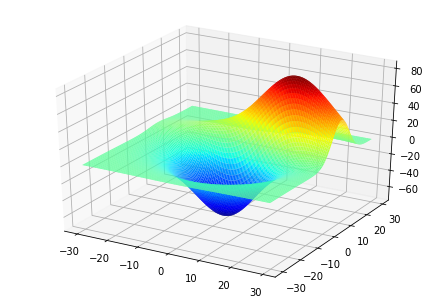

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...


ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()